In [1]:
from rnn import MyGRU, MyLSTM, VanillaRNN, RNN
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# Download the downsampled data frame from csv-file.
raw_data = pd.read_csv(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\s-building_data.csv')

In [3]:
raw_data

,Time,Floor_network_2_temperature,Radiator_network_1_temperature,Ventilation_network_1_temperature,Outside_temperature_average,District_heat_temperature,Domestic_water_network_1_primary_valve,Domestic_water_network_1_temperature,Inside_temperature,CO2_concentration,Energy_consumption,Outside_humidity,Solar_irradiance
0,2021-11-29 10:00:00+00:00,30.4,50.8,45.5,-6.700,90.1,28.3,57.9,21.829167,492.291667,112.0,88,7.3
1,2021-11-29 11:00:00+00:00,31.0,50.7,46.7,-7.000,90.4,28.1,58.0,21.891667,514.583333,102.0,89,164.4
2,2021-11-29 12:00:00+00:00,30.5,50.3,45.6,-7.200,90.3,27.0,57.9,21.950000,542.583333,104.0,88,1.7
3,2021-11-29 13:00:00+00:00,31.1,51.2,46.9,-7.400,90.5,27.5,58.1,21.883333,499.916667,101.0,87,0.6
4,2021-11-29 14:00:00+00:00,31.0,50.1,46.4,-7.500,91.0,28.9,57.9,21.754167,462.375000,96.0,87,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2022-02-08 19:00:00+00:00,28.2,38.8,38.6,0.655,83.5,28.3,58.0,21.387500,437.916667,64.0,96,0.7
1714,2022-02-08 20:00:00+00:00,28.2,38.3,38.7,0.749,83.0,29.7,58.0,21.379167,446.666667,62.0,96,0.3
1715,2022-02-08 21:00:00+00:00,28.2,37.9,38.6,0.712,82.7,28.1,58.0,21.337500,444.666667,63.0,97,0.4
1716,2022-02-08 22:00:00+00:00,28.1,38.3,38.5,0.449,82.6,28.3,58.0,21.337500,442.416667,59.0,90,-0.8


In [9]:
raw_data[raw_data["Time"] < "2022-01-13 11:00:00"]

,Time,Floor_network_2_temperature,Radiator_network_1_temperature,Ventilation_network_1_temperature,Outside_temperature_average,District_heat_temperature,Domestic_water_network_1_primary_valve,Domestic_water_network_1_temperature,Inside_temperature,CO2_concentration,Energy_consumption,Outside_humidity,Solar_irradiance,weekday,hours,hours_sin,hours_cos,weekday_sin,weekday_cos
0,2021-11-29 10:00:00+00:00,30.4,50.8,45.5,-6.70,90.1,28.3,57.9,21.829167,492.291667,112.0,88,7.3,0,10,5.000000e-01,-8.660254e-01,0.000000,1.000000
1,2021-11-29 11:00:00+00:00,31.0,50.7,46.7,-7.00,90.4,28.1,58.0,21.891667,514.583333,102.0,89,164.4,0,11,2.588190e-01,-9.659258e-01,0.000000,1.000000
2,2021-11-29 12:00:00+00:00,30.5,50.3,45.6,-7.20,90.3,27.0,57.9,21.950000,542.583333,104.0,88,1.7,0,12,1.224647e-16,-1.000000e+00,0.000000,1.000000
3,2021-11-29 13:00:00+00:00,31.1,51.2,46.9,-7.40,90.5,27.5,58.1,21.883333,499.916667,101.0,87,0.6,0,13,-2.588190e-01,-9.659258e-01,0.000000,1.000000
4,2021-11-29 14:00:00+00:00,31.0,50.1,46.4,-7.50,91.0,28.9,57.9,21.754167,462.375000,96.0,87,0.3,0,14,-5.000000e-01,-8.660254e-01,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2022-01-13 06:00:00+00:00,27.2,41.5,36.4,3.21,79.1,29.0,58.0,21.466667,453.750000,56.0,83,1.0,3,6,1.000000e+00,6.123234e-17,0.433884,-0.900969
1077,2022-01-13 07:00:00+00:00,27.6,40.4,36.2,3.35,79.5,30.9,57.8,21.500000,463.958333,58.0,85,-0.9,3,7,9.659258e-01,-2.588190e-01,0.433884,-0.900969
1078,2022-01-13 08:00:00+00:00,26.9,41.1,35.8,3.61,79.4,29.2,57.9,21.537500,454.375000,54.0,82,-1.4,3,8,8.660254e-01,-5.000000e-01,0.433884,-0.900969
1079,2022-01-13 09:00:00+00:00,27.4,39.9,35.0,4.26,76.9,26.4,58.1,21.620833,456.708333,54.0,84,427.7,3,9,7.071068e-01,-7.071068e-01,0.433884,-0.900969


In [10]:
nooffset_data = raw_data

In [4]:
# Initialize the model with the required parameters.
hvac_model = MyGRU(quant=['Energy_consumption'], seq=12, fut=0, parameters=['Outside_humidity',
              'Solar_irradiance',
              'CO2_concentration',
              'hours_sin',
              'hours_cos',
              'weekday_sin',
              'weekday_cos',
              'Domestic_water_network_1_primary_valve',
              'District_heat_temperature',
              'Outside_temperature_average',
              'Ventilation_network_1_temperature',
              'Radiator_network_1_temperature'])
              
            
# Scale, split, and sequence the downsampled data frame.
x_train, y_train, x_test, y_test = hvac_model.preprocess(raw_data)

1363
Shape of training data: (1363, 12, 12)
Shape of testing data: (331, 12, 12)


In [5]:
# Train the model using custom fit method. 
# Does hyperparameter optimization automatically in pre-defined search space. Comment row below, if you have already trained the model.
hvac_model.fit(X=x_train, y=y_train, epochs=1000, max_trials=15)
hvac_model.save()

Trial 15 Complete [00h 02m 41s]
val_loss: 0.014605899667367339

Best val_loss So Far: 0.009698542274418288
Total elapsed time: 00h 20m 00s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Energy_consumption_2022-02-10
Showing 15 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 60
layers: 1
activation function: tanh
learning rate: 0.01
Score: 0.009698542274418288
Trial summary
Hyperparameters:
units: 40
layers: 1
activation function: tanh
learning rate: 0.01
Score: 0.009804313571657985
Trial summary
Hyperparameters:
units: 50
layers: 1
activation function: tanh
learning rate: 0.001
Score: 0.009898750681895763
Trial summary
Hyperparameters:
units: 30
layers: 1
activation function: tanh
learning rate: 0.01
Score: 0.010011877209763043
Trial summary
Hyperparameters:
units: 60
layers: 1
activation function: tanh
learning rate: 0.001
Score: 0.010077022822224535
Trial summary
Hyperp

# Save the object to folder in the root of the working directory. Uncomment row below, if you have the model trained already.
hvac_model.load(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\VanillaRNN_Energy_consumption_2022-01-28')

In [16]:
# Calculating prediction intervals
rounds = 12     # Number of data instances to calculate prediction intervals to.

for i in range(rounds):
    
    # Calculating prediction percentiles and saving them to a csv file.
    hvac_model.prediction_interval(x_train, y_train, x_test[i])     # NB! The process is computationally intensive.

Savings prediction intervals to C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-01-10.
Starting bootstrap 1/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.75252768]]
Starting bootstrap 2/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.82357386]]
Starting bootstrap 3/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.72552743]]
Starting bootstrap 4/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  26

[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.79911169]]
Starting bootstrap 35/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.76736161]]
Starting bootstrap 36/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.76607829]]
Starting bootstrap 37/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.79821269]]
Starting bootstrap 38

TypeError: 'tuple' object is not callable

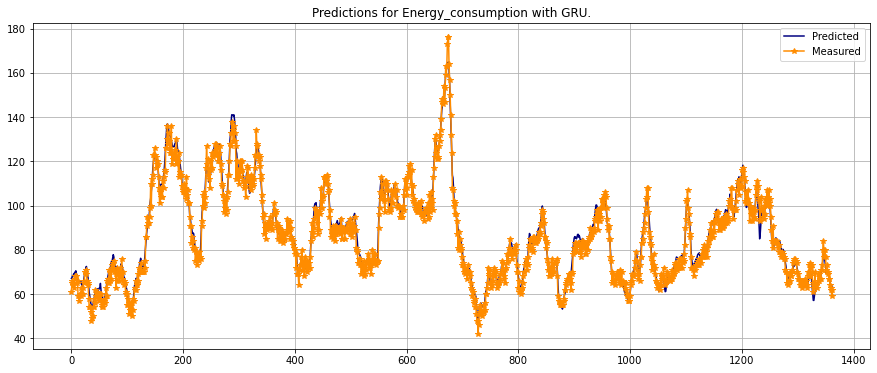

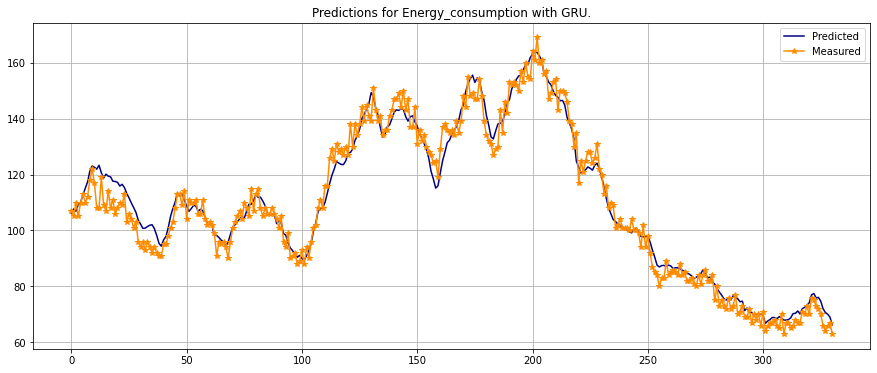

In [6]:
# Making test predictions with the RNN model.
train_preds = hvac_model.model.predict(x_train)
test_preds = hvac_model.model.predict(x_test)

# Loading prediction intervals from disk.
#low, up = hvac_model.load_intervals(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Inside_temperature_2022-01-10\pred_ints.csv')

# Inverse target variables both for measured values and computed predictions.
inv_preds_train, inv_y_train = hvac_model.inv_target(x_train, train_preds, y_train)
inv_preds_test, inv_y_test = hvac_model.inv_target(x_test, test_preds, y_test)
#low, up = hvac_model.inv_target(x_test, low, up)

# Plot model prediction alongside measured values.
# Add lower and upper intervals as arguments to plot them.
hvac_model.plot_preds(inv_preds_train, inv_y_train)
hvac_model.plot_preds(inv_preds_test, inv_y_test)

In [7]:
print("Train MSE: " + str(mean_squared_error(inv_preds_train, inv_y_train)))
print("Test MSE: " + str(mean_squared_error(inv_preds_test, inv_y_test)))
print("Train MAE: " + str(mean_absolute_error(inv_preds_train, inv_y_train)))
print("Test MAE: " + str(mean_absolute_error(inv_preds_test, inv_y_test)))
print("Train MAPE: " + str(mean_absolute_percentage_error(inv_preds_train, inv_y_train)))
print("Test MAPE: " + str(mean_absolute_percentage_error(inv_preds_test, inv_y_test)))

Train MSE: 11.095005782323557
Test MSE: 19.55367852380543
Train MAE: 2.62658535334352
Test MAE: 3.507606153581798
Train MAPE: 0.03075729181844855
Test MAPE: 0.03221099467628243
